# Experiments on artificial data

to be moved to explo branch

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from timeit import default_timer as timer

sys.path.append('../..')
from modules import full_path, path_solver, dual_sorted_L1_norm as dual_norm, pattern, full_path_LASSO, min_SURE, min_SURE_LASSO, SURE_SLOPE

## Setting

In [103]:
# Artificial data
p = 100; n = 50; sigma2 = 1  # p = 100 or 1000
cov  = np.eye(p) + 0.9999 * (1 - np.eye(p)) # 0.9 or 0.9999
rng = np.random.default_rng(4)
X = rng.multivariate_normal(np.zeros(p), cov, n)
beta = np.ones(p)
w = rng.normal(0, np.sqrt(sigma2), n)
y = X@beta + w
Lambda = np.sqrt(range(1,p+1))-np.sqrt(range(0,p))

## Full SLOPE path

In [104]:
# Numba compilation
_ = full_path(X, y , Lambda, ratio=0., k_max=0., rtol_pattern=1e-6, atol_pattern = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)
_ = path_solver(X, y, Lambda, k_max=0., rtol_pattern=1e-6, atol_pattern = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)
_ = full_path_LASSO(X, y, ratio=0., k_max=0., rtol_sign=1e-6, atol_sign = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)

In [105]:
# Full SLOPE path
Gamma, Sol, Primal, Gap, M, Split, T = full_path(X, y , Lambda, ratio=1., k_max=1e4, rtol_pattern=1e-10, atol_pattern = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=1)

node 0: gamma = 48172.286, elapsed time = 3.48e-05s, gap = 0.00e+00
node 1: gamma = 3.929, elapsed time = 3.84e-04s, gap = 2.32e-12
node 2: gamma = 3.820, elapsed time = 4.69e-04s, gap = 7.62e-11
node 3: gamma = 3.371, elapsed time = 5.27e-04s, gap = 9.02e-11
node 4: gamma = 3.264, elapsed time = 5.62e-04s, gap = 1.91e-10
node 5: gamma = 3.077, elapsed time = 6.13e-04s, gap = 2.27e-10
node 6: gamma = 2.993, elapsed time = 6.45e-04s, gap = 1.91e-10
node 7: gamma = 2.630, elapsed time = 7.21e-04s, gap = -3.35e-11
node 8: gamma = 2.628, elapsed time = 7.76e-04s, gap = 1.36e-11
node 9: gamma = 2.571, elapsed time = 8.21e-04s, gap = 6.39e-11
node 10: gamma = 2.495, elapsed time = 8.64e-04s, gap = 1.38e-10
node 11: gamma = 2.471, elapsed time = 9.43e-04s, gap = 3.32e-11
node 12: gamma = 2.436, elapsed time = 1.02e-03s, gap = -3.93e-11
node 13: gamma = 2.176, elapsed time = 1.09e-03s, gap = 6.81e-11
node 14: gamma = 2.115, elapsed time = 1.14e-03s, gap = 5.49e-11
node 15: gamma = 2.093, elaps

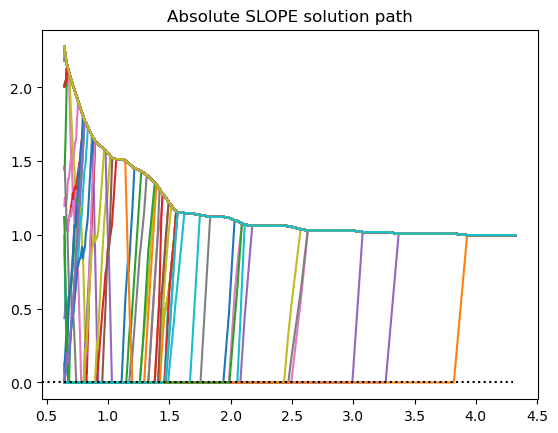

In [106]:
# Absolute SLOPE solution path + ols
abs_Sol = [np.abs(sol) for sol in Sol]

fig, ax = plt.subplots()
ax.plot([1.1*Gamma[1]] + Gamma[1:], [abs_Sol[1]] + abs_Sol[1:])
# for gamma in Gamma[1:]:
    # ax.axvline(gamma, color='k', linestyle=':')
ax.axhline(0, color='k', linestyle=':', xmax=0.95)

# ax.set_xscale('symlog')
ax.set_title('Absolute SLOPE solution path')
plt.show() 

## SURE exact minimization

In [107]:
# SURE exact minimization
Critical, SURE, Sol = min_SURE(X, y, Lambda, Gamma, M, sigma2, tol=1e-10)   
i0 = np.argmin(SURE)
print(f'SURE minimizer: gamma = {Critical[i0]:.3f}')
print(f'SURE minimum: sure(gamma) = {SURE[i0]:.3f}')    

SURE minimizer: gamma = 1.111
SURE minimum: sure(gamma) = 2.577


In [121]:
gamma = Critical[i0]
# print(Sol[i0])
sol, *_ = path_solver(X, y , gamma*Lambda, k_max=1e4, rtol_pattern=1e-10, atol_pattern = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=0)
# print(sol)
SURE_SLOPE(X, y, sol, sigma2, tol=1e-10)

Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)


2.577321051173591

## SURE as an unbiased estimator of the prediction error

In [101]:
n_samples = 1000
sure_slope = []; err_slope = []

rng = np.random.default_rng(4)
for i in range(n_samples):
    w = rng.normal(0, np.sqrt(sigma2), X.shape[0])
    y = X@beta + w
    sol, *_ = path_solver(X, y , Lambda, k_max=1e4, rtol_pattern=1e-10, atol_pattern = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=0)
    sure_slope.append(SURE_SLOPE(X, y, sol, sigma2, tol=1e-10))
    err_slope.append(np.linalg.norm(X@sol - X@beta, ord=2)**2)
print(f'average SURE for SLOPE: {np.mean(sure_slope):.3f}')
print(f'prediction error for SLOPE: {np.mean(err_slope):.3f}')


Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > run_gamma

## Comparison of SLOPE and LASSO

In [126]:
n_samples = 100
sure_slope = []; err_slope = []; sure_lasso = []; err_lasso = []; #err_ols = []
MSE_slope = []; MSE_lasso = []; #MSE_ols = []    

rng = np.random.default_rng(2)
for i in range(n_samples):
    # white noise
    w = rng.normal(0, np.sqrt(sigma2), X.shape[0])
    y = X@beta + w
    # SLOPE
    Gamma, Sol, Primal, Gap, M, Split, T = full_path(X, y, Lambda, ratio=1., k_max=1e4, rtol_pattern=1e-10, atol_pattern = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=0)
    Critical, SURE, Sol = min_SURE(X, y, Lambda, Gamma, M, sigma2, tol=1e-10)
    i0 = np.argmin(SURE)
    sure_slope.append(SURE[i0])
    err_slope.append(np.linalg.norm(X@Sol[i0]-X@beta,ord=2)**2)
    MSE_slope.append(np.linalg.norm(Sol[i0]-beta,ord=2)**2)
    # LASSO
    Gamma, Sol, S, Split, T = full_path_LASSO(X, y, ratio=1., k_max=1e4, rtol_sign=1e-10, atol_sign = 1e-10, rtol_gamma=1e-10, split_max=1e1, log=0)
    Critical, SURE, Sol = min_SURE_LASSO(X, y, Gamma, S, sigma2, tol=1e-10)
    i0 = np.argmin(SURE)
    sure_lasso.append(SURE[i0])
    err_lasso.append(np.linalg.norm(X@Sol[i0]-X@beta,ord=2)**2)
    MSE_lasso.append(np.linalg.norm(Sol[i0] - beta,ord=2)**2)
    # # OLS
    # sol = np.linalg.solve(X.T@X, X.T@y)
    # err_ols.append(np.linalg.norm(X@sol-X@beta,ord=2)**2)
    # MSE_ols.append(np.linalg.norm(sol - beta,ord=2)**2)

print(f'average SURE for SLOPE: {np.mean(sure_slope):.3f}')
print(f'average SURE for LASSO: {np.mean(sure_lasso):.3f}')
print(f'prediction error for SLOPE: {np.mean(err_slope):.3f}')
print(f'prediction error for LASSO: {np.mean(err_lasso):.3f}')
# print(f'prediction error for OLS: {np.mean(err_ols):.3f}')
print(f'MSE for SLOPE: {np.mean(MSE_slope):.3f}')
print(f'MSE for LASSO: {np.mean(MSE_lasso):.3f}')
# print(f'MSE for OLS: {np.mean(MSE_ols):.3f}')

Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong sign (gamma_g > gamma - tol)
Stopping: not able to compute gamma_split (split_max reached)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: not able to compute gamma_split (split_max reached)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: not able to compute gamma_split (split_max reached)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
Stopping: nodes too closed or wrong pattern (gamma_s > gamma - tol)
S